#### Understanding SMOTE (Synthetic Minority Over-sampling Technique)

#### Imagine you have a dataset where you need to classify data into two categories:  
#### - **Category 1** (labeled as **'1'** or **'yes'**) appears **900 times** (majority class).  
#### - **Category 2** (labeled as **'0'** or **'no'**) appears **100 times** (minority class).  

#### Since the number of ‘1’s is much higher than ‘0’s, the model might learn to predict ‘1’ more often because it appears more frequently. This creates an **imbalance**, leading to a biased model that does not learn properly from the minority class.  

---

#### How to Fix This? (SMOTE)  
#### Instead of simply duplicating existing minority class samples (as in oversampling), **SMOTE creates new synthetic samples** for the minority class using interpolation techniques.  

#### Steps:  
#### 1. Identify the **majority class** (here, ‘1’) and the **minority class** (here, ‘0’).  
#### 2. Use **SMOTE** to generate synthetic samples for the minority class based on its existing data points.  
####    - It selects a sample from the minority class and generates a new synthetic data point **between** that sample and its nearest neighbors.  
####    - In this example, **SMOTE increases '0' from 100 to 900**, so both classes have **900 samples each**.  
#### 3. Train the model on this **balanced dataset** using a suitable machine learning algorithm.  

---

#### Why Do We Use SMOTE Instead of Simple Oversampling?  
#### - **Avoids overfitting**: Unlike simple duplication, SMOTE generates new, realistic data points.  
#### - **Maintains diversity**: New synthetic samples add variety instead of repeating the same data.  
#### - **Works well with large datasets**: SMOTE can improve model performance without excessive memory usage.  

---

#### Key Takeaway  
#### SMOTE helps **balance the dataset by generating synthetic samples for the minority class**, allowing the model to learn from both classes fairly without overfitting. This makes it a more effective alternative to simple oversampling.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [20]:
X, y = make_classification(n_samples=500, n_features=2,n_redundant=0, weights=[0.9, 0.1], random_state=19)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

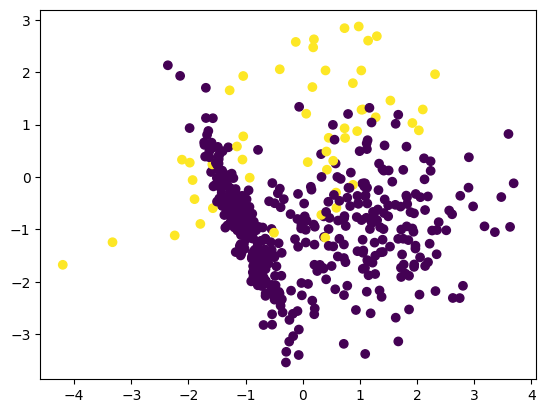

In [22]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')

## Before sampling

In [23]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [24]:
clf_before = LogisticRegression()
clf_before.fit(X_train,y_train)

LogisticRegression()

<Axes: >

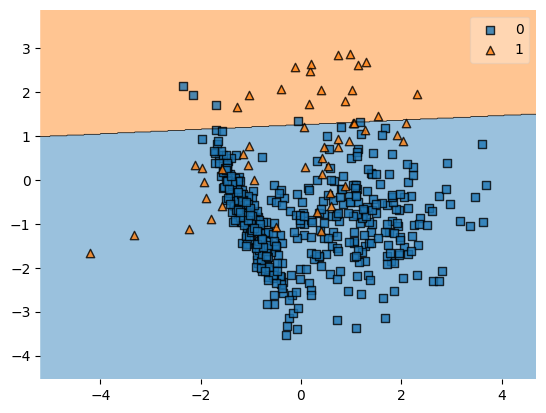

In [25]:
plot_decision_regions(X,y,clf_before)

## After Sampling

In [26]:
smote = SMOTE(random_state=4)
X_samp, y_samp = smote.fit_resample(X_train,y_train)

In [27]:
X_samp.shape

(716, 2)

In [28]:
count_zero = sum(y_samp==0)
count_one = sum(y_samp==1)
print("count of zero: ",count_zero)
print("count of one: ",count_one)

count of zero:  358
count of one:  358


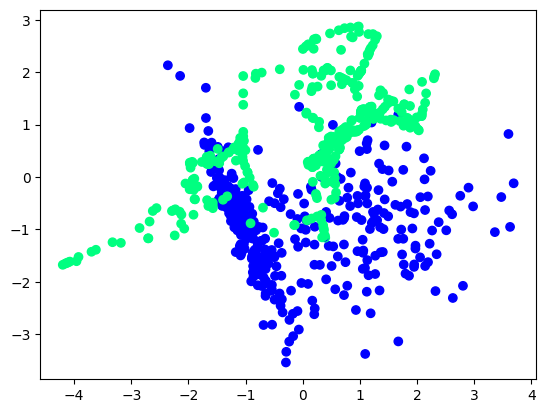

In [29]:
plt.scatter(X_samp[:,0],X_samp[:,1],c=y_samp,cmap='winter')

<Axes: >

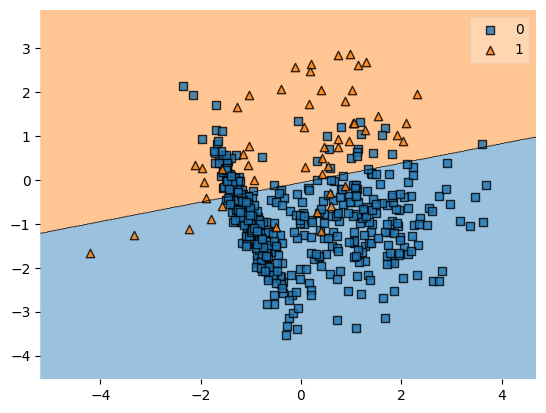

In [30]:
clf = LogisticRegression()
clf.fit(X_samp,y_samp)
plot_decision_regions(X,y,clf)